In [ ]:
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Path to your dataset zip
zip_path = '/content/test_set.zip'
img_size = 64

data = []
labels = []
images = []
filenames = []

# Read images directly from zip
with zipfile.ZipFile(zip_path, 'r') as archive:
    for file in archive.namelist():
        if file.endswith(".jpg") or file.endswith(".png"):
            with archive.open(file) as f:
                file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
                img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))
                    data.append(img.flatten())
                    images.append(img[:, :, ::-1])  # BGR→RGB for matplotlib
                    filenames.append(file)
                    labels.append(0 if "cat" in file.lower() else 1)

# Convert to arrays
X = np.array(data)
y = np.array(labels)
images = np.array(images)

print("Dataset Loaded:", X.shape, y.shape)

Dataset Loaded: (2023, 12288) (2023,)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test, img_train, img_test, files_train, files_test = train_test_split(
    X, y, images, filenames, test_size=0.2, random_state=42
)

# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

Accuracy: 0.562962962962963

Classification Report:
               precision    recall  f1-score   support

         Cat       0.57      0.60      0.59       209
         Dog       0.55      0.52      0.54       196

    accuracy                           0.56       405
   macro avg       0.56      0.56      0.56       405
weighted avg       0.56      0.56      0.56       405



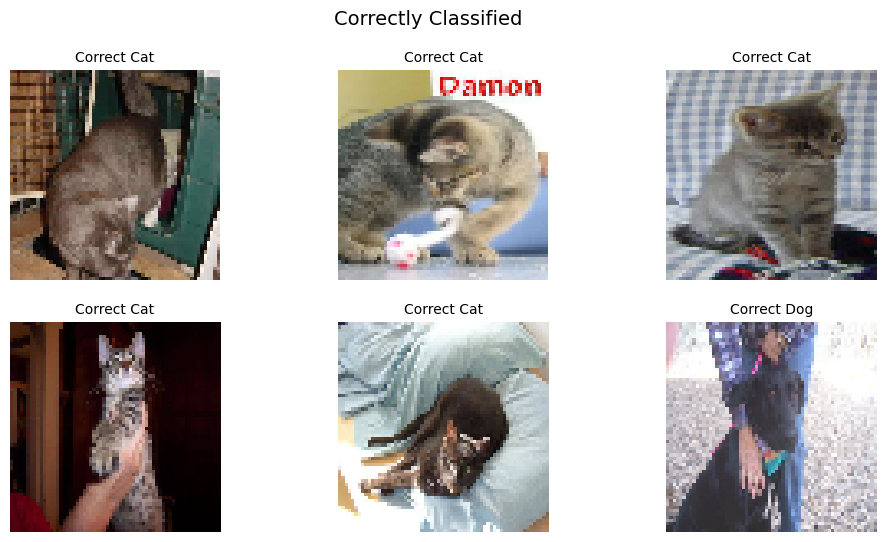

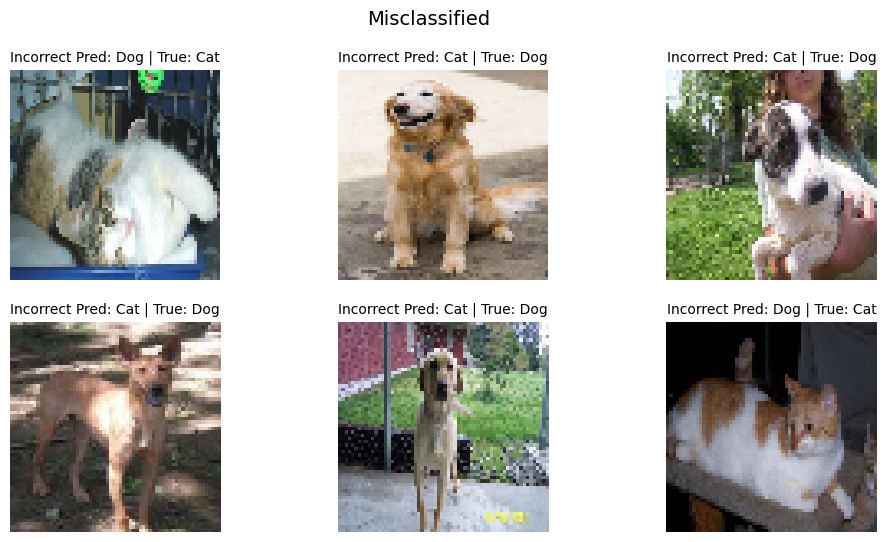

In [11]:
# Function to visualize results
def show_samples(images, labels_true, labels_pred, correct=True, n=6):
    plt.figure(figsize=(12, 6))
    count = 0
    for i in range(len(images)):
        if correct and labels_true[i] == labels_pred[i]:
            title = f"Correct {['Cat','Dog'][labels_pred[i]]}"
        elif not correct and labels_true[i] != labels_pred[i]:
            title = f"Incorrect Pred: {['Cat','Dog'][labels_pred[i]]} | True: {['Cat','Dog'][labels_true[i]]}"
        else:
            continue

        plt.subplot(2, 3, count+1)
        plt.imshow(images[i])
        plt.title(title, fontsize=10)
        plt.axis("off")
        count += 1
        if count >= n:
            break
    plt.suptitle("Correctly Classified" if correct else "Misclassified", fontsize=14)
    plt.show()

# Show correct and incorrect samples
show_samples(img_test, y_test, y_pred, correct=True, n=6)
show_samples(img_test, y_test, y_pred, correct=False, n=6)

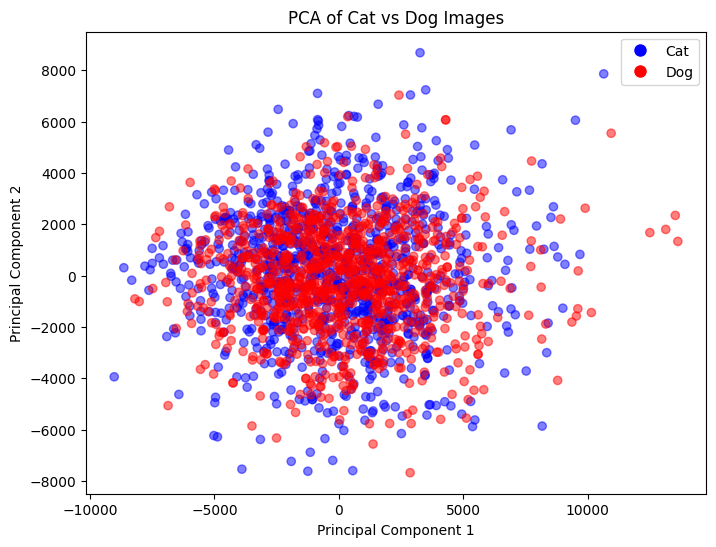

In [13]:
# Scatter plot
from sklearn.decomposition import PCA

# Reduce image data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot
plt.figure(figsize=(8,6))
colors = ['blue' if label==0 else 'red' for label in y]
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0.5)
plt.title("PCA of Cat vs Dog Images")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Cat', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Dog', markerfacecolor='red', markersize=10)])
plt.show()
